# Lab 2 - W203 - Statistics for Data Science

#### Submission by Jude Kavalam, Harshit Patel, Abhi Sharma

## Install packages

In [1]:
install.packages("dplyr")
library(dplyr)
install.packages("rcompanion")
library(rcompanion)
install.packages("repr")
library(repr)
install.packages("effsize")
library(effsize)

# set standard height and width for images displayed
options(repr.plot.width=5, repr.plot.height=5)


  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  0.8.4  0.8.5              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\Rtmpiqtw7X\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\Rtmpiqtw7X\downloaded_packages


Warning message:
"package 'rcompanion' was built under R version 3.6.3"

package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\Rtmpiqtw7X\downloaded_packages


Warning message:
"package 'repr' was built under R version 3.6.3"

package 'effsize' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhisha.REDMOND\AppData\Local\Temp\Rtmpiqtw7X\downloaded_packages


Warning message:
"package 'effsize' was built under R version 3.6.3"

## Get Data Function

In [2]:
get_data = function() {
    wd = getwd()
    return (read.csv(paste(wd, "/", "anes_pilot_2018.csv", sep="")))    
}


In [3]:
data = get_data()
head(data)

,version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,...,rand_emp,rand_climate,rand_rural,rand_pk,rand_pid,starttime,endtime,duration,optintimestamp,completes
,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>
1,ANES 2018 Pilot Study main version 20190129,1,1.2555080,0.7286969,1,4,2,1,4,-1,...,1,2,2,1,1,12/10/2018 18:34:11,12/10/2018 20:00:03,5152,10/15/15,46
2,ANES 2018 Pilot Study main version 20190129,2,0.5694911,0.3305327,2,1,2,3,-1,-1,...,2,1,1,0,2,12/10/2018 19:26:37,12/10/2018 19:53:12,1595,7/16/16,55
3,ANES 2018 Pilot Study main version 20190129,3,0.9720616,0.5641846,1,4,3,3,-1,-1,...,2,2,1,1,2,12/10/2018 19:48:44,12/10/2018 20:21:21,1957,6/13/14,8
4,ANES 2018 Pilot Study main version 20190129,4,2.4500732,1.4220225,1,4,2,1,4,-1,...,2,2,1,0,1,12/10/2018 19:03:49,12/10/2018 19:21:08,1039,10/28/15,42
5,ANES 2018 Pilot Study main version 20190129,5,1.6348200,0.9488495,2,1,3,1,4,-1,...,2,1,2,1,2,12/10/2018 18:28:14,12/10/2018 18:43:23,909,11/11/15,33
6,ANES 2018 Pilot Study main version 20190129,6,1.8184054,1.0554025,1,3,2,2,2,2,...,1,2,1,1,2,12/10/2018 23:58:17,12/11/2018 5:10:57,18760,5/9/15,185


In [4]:
nrow(data)


[1] 2500

In [5]:
ncol(data)


[1] 767

In [6]:
length(data)

[1] 767

Data context: https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf 

Questionnaire: https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf

## Filter Functions

Here are some generic functions that help slice the data in convenient ways which can be used across all the research questions

In [7]:
filter_skp = function(df, skp_prefix, skp_values) {
    skp_col = paste(skp_prefix, "_skp", sep = "")
    return (df %>% filter(df[, skp_col] %in% skp_values))
}

# Usage
# x = filter_skp(data, "ftpolice", c(0,1))
# nrow(x)

In [8]:
filter_col = function(df, colname, colvalues) {
    return (df %>% filter(df[, colname] %in% colvalues))
}

# Usage
# x = filter_var(data, "geangry", c(1,2))
# nrow(x)

In [9]:
filter_timing = function(df, timing_prefix, time_threshold) {
    timing_col = paste(timing_prefix, "_page_timing", sep= "")
    return (df %>% filter(df[, timing_col] <= time_threshold))
}

# Usage
# x = filter_timing(data, "ftpolice", 10)
# nrow(x)
# summary(x$ftpolice_page_timing)

In [10]:
filter_honest = function(df, honest_vals) {
    return (df %>% filter(df[, "honest"] %in% honest_vals))
}

#Freq. Numeric Label
#37      1     Never
#46      2     Some of the time
#90      3     About half the time
#215     4     Most of the time
#2112    5     Always

# Usage
# x = filter_honest(data, c(1))
# nrow(x)


In [11]:
filter_nonserious = function(df, ns_vals) {
    return (df %>% filter(df[, "nonserious"] %in% ns_vals))
}

#Freq. Numeric Label
#2007    1     Never
#157     2     Some of the time
#109     3     About half the time
#55      4     Most of the time
#172     5     Always

# Usage
# x = filter_nonserious(data, c(1))
# nrow(x)

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly. (5 points)
Will need to use ftpolice (How would you rate the police?) and ftjournal (How would you rate journalists?)

These are measured on a thermal scale (ordinal) from 0 to 100. The variables capturing the rating are:
1. ftpolice_therm for ftpolice
2. ftjournal_therm for ftjournal

The key assumption we're making here is that these ratings (ftpolice and ftjournal) are being used to measure "respect levels" for these professions. This is a reasonable assumption given that there are no other variables to capture this sentiment.

Its important to call out the ordinal nature of the scale and how a value of 55 for respondent 1 may differ from the same value of 55 for respondent 2. In other words, **the same score for a group (say police) may have different meanings for different respondents.**

However, the score of ftpolice = 90 and ftjournal = 55 for a particular respondent shows that the respondent in question has more respect for police than journalists. In other words, **different scores for the same respondent on the 2 groups have comparable interpretation.** 

Hence, the data captured is in pairs. For each respondent, we have 2 scores and we can compare these scores to form proportions of voters that like the police vs journalists.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
 
There are certain variables of interest along which we can slice the number of respondents we consider in the test:

First we create a base data set (called q1_data):

**1. honest** <br/>
This represents respondents who answered the survey honestly. To get reliable results, **we will only consider respondents who are honest for this question.** It is important that we consider responses where people feel honest when answering questions regarding respect for professionals in police vs journalism.

**2. ftpolice_page_timing and ftjournal_page_timing** <br/>
This represents the time taken for a respondent to answer the corresponding questions (ftpolice and ftjournal). The reason why this may have been potentially interesting is because if a respondent takes too long to answer the question, then he / she maynot be sure about how they feel about the police / journalists. The 90th percentile for each variable seems to be within 12 seconds, which seems like a reasonable time to answer the question "without hestitation". **We will further explore this variable and discard responses > (say) 30 seconds.**

**3. nonserious** <br/>
This represents respondents who had degrees of nonserious-ness in the survey. **We will consider respondents who have values for nonserious=[1,2,3] as our entire population.** We want only serious candidates to be considered when answering a question like this. 

Next, we consider further slicing our base data set (q1_data) based on certain attributes:

**1. ftpolice_skp and ftjournal_skp** <br/>
This represents the variable where a candidate was asked a question, but decided to skip the question the first time around. This may reveal the hesitant nature of the respondent to answer the question directly. Hence, we will check the percentage of our base data set to determine how many respondents skipped these questions. If this distribution is fairly large, we will consider doing 2 sets of tests (where skp=0 vs considering all skp values).

**2. nonserious** <br/>
We will check what percentage of the base data set population is very serious (ie, nonserious=1) and will make a decision to further conduct a separate test with only a very serious population (or not).


In [ ]:
# EDA for ftpolice_page_timing
d = get_data()
paste("Summary for ftpolice_page_timing")
summary(d$ftpolice_page_timing)

paste("Number of ftpolice_page_timing > 30 seconds")
nrow(d[d$ftpolice_page_timing > 30,])
# note that we will remove the 33 rows that are > 30 seconds in response time

In [ ]:
# EDA for ftjournal_page_timing
paste("Summary for ftjournal_page_timing")
summary(d$ftjournal_page_timing)

paste("Number of ftjournal_page_timing >= 30 seconds")
nrow(d[d$ftjournal_page_timing > 30,])
# note that we will remove the 29 rows that are > 30 seconds in response time

In [ ]:
# EDA for honest
paste("Summary for honest")
summary(d$honest)

paste("Percentage of always honest respondents")
as.numeric(nrow(d[d$honest == 5,]) / nrow(d)) * 100

hist(d$honest, main = "Histogram of Honest variable", xlab = "Honest label", col = "lightblue", border = "black")

In [ ]:
# EDA for nonserious
paste("Summary for nonserious")
summary(d$nonserious)

paste("Percentage of nonserious=[1,2,3] respondents")
as.numeric(nrow(d[d$nonserious %in%  c(1,2,3),]) / nrow(d)) * 100

hist(d$nonserious, main = "Histogram of Nonserious variable", xlab = "Nonserious label", col = "lightblue", border = "black")

#### Let's construct our base data set (q1_data)

In [ ]:
# create base data set 
q1_data = get_data()

# consider only "always honest" respondents 
q1_data = filter_honest(q1_data, c(5))

# consider respondents with _page_timing less than equal to 30 seconds
q1_data = filter_timing(q1_data, "ftpolice", 30)
q1_data = filter_timing(q1_data, "ftjournal", 30)

# consider only respondents with nonseriousness levels 1,2,3 
q1_data = filter_nonserious(q1_data, c(1,2,3))

nrow(q1_data)

In [ ]:
# We further slice our data on the basis of very serious vs our population of serious [1,2,3] respondents
q1_data_serious = filter_nonserious(q1_data, c(1))
nrow(q1_data_serious)/nrow(q1_data) * 100

#### We notice that the very serious (nonserious=1) population is a large portion of the data we are working with.  So we will decide NOT to conduct separate tests for very serious (nonserious=1) vs semi serious (nonserious=[1,2,3]) 

In [ ]:
# we further investigate the ftpolice_skp and ftjournal_skp variables

# EDA for ftpolice_skp
paste("Summary for ftpolice_skp")
summary(q1_data$ftpolice_skp)

paste("Percentage of non-zero ftpolice_skp")
as.numeric(nrow(q1_data[q1_data$ftpolice_skp %in%  c(1),]) / nrow(q1_data)) * 100
# < 1% of the respondents chose to skip the ftpolice question. This shows the respondents are not hesitant!

# EDA for ftjournal_skp
paste("Summary for ftjournal_skp")
summary(q1_data$ftjournal_skp)

paste("Percentage of non-zero ftjournal_skp")
as.numeric(nrow(q1_data[q1_data$ftjournal_skp %in%  c(1,2),]) / nrow(q1_data)) * 100
# < 1% of the respondents chose to skip the ftjournal question. This shows the respondents are not hesitant!

#### We conclude that there were very few (< 1%) of respondents from our base data set that chose to skip the ftpolice or ftjournal question. So we will NOT conduct further tests based on skp=0 vs all skp.

#### Basic Analysis of ftpolice and ftjournal

In [ ]:
paste("Summary for ftpolice")
summary(q1_data$ftpolice)

paste("Unique values for ftpolice")
unique(q1_data$ftpolice)
# we observe there are no "invalid" values (negative values, values outside of 0-100)

hist(q1_data$ftpolice, xlab = "ftpolice score", main = "Histogram of ftpolice", col = "lightblue", border = "black")

#### Due to the ordinal and likert nature of the ftpolice score, we cannot construct any distribution of the variable. 
#### However, we notice a skewness in high respect for police based on the histogram.  

In [ ]:
paste("Summary for ftjournal")
summary(q1_data$ftjournal)

paste("Unique values for ftjournal")
unique(q1_data$ftjournal)
# we observe there are negative values for ftjournal, which is also evident from the histogram

hist(q1_data$ftjournal, xlab = "ftjournal score", main = "Histogram of ftjournal", col = "lightblue", border = "black")


#### Due to the ordinal and likert nature of the ftjournal score, we cannot construct any distribution of the variable. 
#### However, we notice an almost bi-modal nature in ftjournal score - people are divided on their respect levels for journalists  

In [ ]:
# we notice there are values for ftjournal < 0, so we need to remove these rows as they are missing values
paste("ftjournal scores less than 0")
nrow(q1_data[q1_data$ftjournal < 0,])

paste("ftjournal scores >= 0")
q1_data = q1_data[q1_data$ftjournal >= 0,]
nrow(q1_data)

In [ ]:
# sanity check on having the right values for our tests
nrow(q1_data[q1_data$ftjournal >= 0 & q1_data$ftpolice >= 0,]) == nrow(q1_data)
nrow(q1_data[q1_data$ftjournal <= 100 & q1_data$ftpolice <= 100,]) == nrow(q1_data)

### Based on your EDA, select an appropriate hypothesis test. (5 points)

Few observations:

1. The measurements are likert variables, we cannot say that the difference between 5 and 6 is the same between 89 and 90. These are NOT metric values.
2. Having said that, a score of 89 is more favorable than a score of 5 **(ordinal behavior)**.
3. However, these are **comparable in measurement across groups** because they are measured on the SAME scale and measured against the SAME audience.
4. The distribution of both ftpolice and ftjournal cannot be determined due to likert nature. **So we will have to use "non parametric tests"**.
5. Note that we are NOT interested in "how much more" do US voters respect police vs journalists. We are interested in "which group is respected more". Specifically, **we are interested in the sign of the test** where the sign indicates which side US voters respect more. Note that because we use non-parametric signed tests, we are throwing out information of the likert scale.
6. These are **paired measurements against the same individual across 2 groups** - journalists and policemen.
7. Notice sample size is large, n > 40.
8. Hence, we will conduct a paired non parametric test, specifically, the **Signed test for Dependent Samples**
9. We **could have performed a Wilcoxon Signed-Rank test for paired data**, but that will answer the question - "How much more / less are the police respected compared to journalists by US Voters?" **if we could subtract these therm variables**. That answers a different question from the one being asked, although it would have more statistical power than the signed test. 

Assumptions:

1. We can assume as per instructions in the lab that each pair of ftpolice and ftjournal, say (p, j) are IID from every other pair.
2. We do have an ordinal scale for measurement (0 to 100 therm scale)

Consequence:
1. Because we are throwing away all our likert information, we **lose some statistical power with the signed test.**

Hypothesis:

1. Let plus = number of total events of seeing ftpolice > ftjournal
2. Let minus = number of total events of seeing ftpolice < ftjournal
3. Here, plus ~ Binomial(n, 0.5)

**Ho: Prob(plus) = Prob(minus)**

**Ha: Prob(plus) != Prob(minus)**

### Conduct your test. (5 points)

In [ ]:
equal_hat = nrow(q1_data[q1_data$ftpolice == q1_data$ftjournal,])
plus_hat = nrow(q1_data[q1_data$ftpolice > q1_data$ftjournal,])
minus_hat = nrow(q1_data[q1_data$ftpolice < q1_data$ftjournal,])
total_hat = as.numeric(equal_hat + plus_hat + minus_hat)
# ignore equal scores of ftjournal and ftpolice for binomial test
n = total_hat - equal_hat

paste("ftpolice == ftjournal:", equal_hat)
paste("ftpolice > ftjournal:", plus_hat)
paste("ftpolice < ftjournal:", minus_hat)
paste("total:", total_hat)
paste("total - equal:", n)

# binomial test
p = 0.5
mean = n * p
threshold = abs(plus_hat - mean)
paste("The mean:", mean)
paste("The threshold:", threshold)
# p value is prob that |plus - mean| >= threshold
# to find p value
# P(plus - 910.5 >= 122.5) and P(910.5 - plus >= 122.5)
# P(plus >= 1033) and P(plus <= 788)

binom.test(x = c(plus_hat, minus_hat), n, p = 0.5, alternative = c("two.sided"), conf.level = 0.95)

#### The above shows that we reject the null hypothesis as the p value is very small at 5% level of significance. We see that probabilities of the number of successes in the 2 groups is NOT equal.

#### We see probability of success is around 56%. This implies that the US voters do like policemen more than journalists.

In [ ]:
# infact, if we did the test one sided, where the alternative is that 
# Prob(# fav. ftpolice scores) > Prob(# fav. ftjournal scores) 
binom.test(x = c(plus_hat, minus_hat), n, p = 0.5, alternative = c("greater"), conf.level = 0.95)
# this further shows that the alternative hypothesis is favorable, 
# where probability of police respect cases is more than probability of journalism respect cases

**Effect Size For Signed Test**

1. We can think of the proportion of police population as the effect size
2. We can also think of (plus_hat - minus_hat) / n as the effect size
3. Since n is large, the effect size is actually significant


In [ ]:
plus_hat/n

In [ ]:
(plus_hat - minus_hat)/n

#### We can conclude that there is a real difference between the respect levels for police vs journalists. US voters respect the police more!

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)


#### Variables operationized
There are four variables I am using to validate the hypothesis that Republican voters are younger than Democrat voters
<dl>
  <dt>honest</dt>
  <dd><em>Question: </em>"How often would you say you answered the questions honestly on this survey."
  <br>The range of responses are 1-5 which corelate from Never - Always. I have restricted the observations to only those who answer <em>always (5)</em></dd>
  <br>
  <dt>pid1r</dt>
  <dd><em>Question: </em>"Generally speaking, do you usually think of yourself as a Republican, a Democrat, an
independent, or what?"</dd>
  <br>  
  <dt>pid1d</dt>
  <dd><em>Question: </em>"Generally speaking, do you usually think of yourself as a Democrat, a Republican, an
independent, or what?"<br>
      As you can see this is essentially the same question with the just the <em>order</em> of the party name changed. The two responses I am interested in are 1 or 2. This corresponds to the first or second party mentioned in the questions
  </dd>
  <br>
    
  <dt>birthyr</dt>
  <dd><em>Question: </em>“In what year were you born?”<br>
      The response to this question was the year of birth. Since this survey was taken in 2018, for calculation of age, to determine age, we used:
      
```python
2018 - birthyr 
```
  </dd>
  <dt>Gaps</dt>
  <dd>1. There is an assumption that a "Republican voter" (i.e. someone who voted for the Republican candidate) also identfies as a Republican, and similarly for Democrat voter. It is quite likely that many who identify with one party, can vote for another party</dd>
  <br>
    <dd>2. There is another variable <em>nonserious</em> that while interesting, brought with it social implications that were beyond the scope for this exercise and I decided to ignore that variable</dd>
    
</dl>

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)

In [ ]:
data = read.csv( "anes_pilot_2018.csv")
# apply honestly filter
hon_respondents = data[data$honest == 5,]
paste(cat("Number of honest respondents: :", nrow(hon_respondents)))

honest.code <- c(Never=1, `Some of the time`=2, `Half of the time`=3, `Most of the time`=4,  Always=5)
h_responses = names(honest.code)[match(data$honest, honest.code)]
paste(cat("First 6 reponses in honest variable are:","\n",head(h_responses)))

pid1d.code <- c( Democrat=1, Republican=2, independent=3, 'something else'=4)
pid1r.code <- c( Republican=1, Democrat=2, independent=3, 'something else'=4)
p1did_responses = names(pid1d.code)[match(data$pid1d, pid1d.code)]
p1dir_responses = names(pid1r.code)[match(data$pid1r, pid1r.code)]

paste(cat("First 6 reponses in pid1d are: ", head(p1did_responses)))
paste(cat("First 6 reponses in pid1r are:", head(p1dir_responses)))
paste(cat("Ages of first 6 respondents calculated to be: ", head(2018-data[, c("birthyr")])))

### Based on your EDA, select an appropriate hypothesis test.  (5 points)

In [ ]:
all_honest_reps = rbind(data[data$pid1r==1 & data$honest==5,], data[data$pid1d==2 & data$honest==5,])
all_honest_dems = rbind(data[data$pid1r==2 & data$honest==5,], data[data$pid1d==1 & data$honest==5,])
paste(cat("Number of observerations or Republicans: ", nrow(all_honest_reps)))
paste(cat("Number of observerations or Democrats: ", nrow(all_honest_dems)))


ages_of_reps = 2018-all_honest_reps[,c('birthyr')]
ages_of_dems = 2018-all_honest_dems[,c('birthyr')]
hist(ages_of_reps, col="red")
hist(ages_of_dems, col="blue")


Since the data are normally distributed, we can use a parametric test and since we are comparing the means of two samples, we can use the Welches Two Sample t-test (IOW, "unpaired" or "independent samples" t-test)

H0: There is no significant difference between the mean of the ages of democrats vs republicans

HA: The mean of the ages of one of the groups is significantly higher than the other

### Conduct your test. (5 points)

In [ ]:
t.test(ages_of_dems, ages_of_reps, alternative = "two.sided", 0, paired = FALSE, var.equal = FALSE )

Based on this test, we can say with 95% confidence that there is no significant difference between the means of the ages of the Republican voters and the Democratic voters

The manimum difference of the mean can be as low as -2.40 or has high as 1.19.

The sample means are 52.33 for republicans and 52.92 for democrats.
    
Based on this we <em>do not have enough evidence to reject the null hypothesis</em> that there is no difference between the means.



In [ ]:
cohen.d(ages_of_dems, ages_of_reps)

The CohensD test returns an estimate of 0.036 which indicates that the effect is negligible 

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)

Explain how your variables are operationalized. Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

#### Variables operationized
There are seven variables I am using to validate the hypothesis that the federal investigations of Russian election interference are baseless.
<dl>
  <dt>honest</dt>
  <dd><em>Question: </em>"How often would you say you answered the questions honestly on this survey."
  <br>The range of responses are 1-5 which corelate from Never - Always. I have restricted the observations to remove those who answered <em>Never (1)</em></dd>
  <br>
    
  <dt>nonserious</dt>
  <dd><em>Question: </em>"We sometimes find people don't always take surveys seriously, instead providing funny or
insincere answers. How often would you say that you were not serious in answering
questions on this survey?"
  <br>The range of responses are 1-5 which corelate from Never - Always. I have restricted the observations to remove those who answered <em>Always (5)</em></dd>
  <br>
  
  <dt>pid1r</dt>
  <dd><em>Question: </em>"Generally speaking, do you usually think of yourself as a Republican, a Democrat, an
independent, or what?"</dd>
  <br>  
  <dt>pid1d</dt>
  <dd><em>Question: </em>"Generally speaking, do you usually think of yourself as a Democrat, a Republican, an
independent, or what?"<br>
      As you can see this is essentially the same question with the just the <em>order</em> of the party name changed. The response I am interested is for both questions is 3 i.e. Independent.
  </dd>
  <br>
  
   <dt>pid7x</dt>
  <dd><em>Question: </em>"Party ID summary"
  <br>The range of responses are from -7 to 7. I have restricted the observations to include those who answered <em>Independent (4)</em></dd>
  <br>  
    
   <dt>russia16</dt>
  <dd><em>Question: </em>"Do you think the Russian government probably interfered in the 2016 presidential election
to try to help Donald Trump win, or do you think this probably did not happen?"
  <br>I am checking their view on Russia's involvement, on the sample set I got from above 5 variables<em>This probably did not happen(2)</em></dd>
  <br>
  
  <dt>coord16</dt>
  <dd><em>Question: </em>"Do you think Donald Trump’s 2016 campaign probably coordinated with the Russians, or do
you think his campaign probably did not do this?"
  <br>I am checking their view on Russia's involvement, on the sample set I got from first 5 variables <em>Probably did not (2)</em></dd>
  <br>
    
 
  <dt>Gaps</dt>
  <dd>1. There is an assumption that a "Independent voter" (i.e. someone who is neither Republican nor Democrat) is indeed Independent and doesn't have bias in his opinion. </dd>
  <br>
    <dd>2. The variables <em>honest</em> and <em>nonserious</em> are both very subjective to people. We are including people in our sample space who might or might not be honest/nonserious. We have only neglected the people who were clear they didn't take the questionaire seriousloy.</dd>
    
</dl>

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)

In [ ]:
#For mutate
library(dplyr)
#For cohend
library(effsize)
#For test
library(BSDA)

I = read.csv("/Users/hmpatel/Desktop/prepare/AIML/MIDS/W203 Statistics/lab2/anes_pilot_2018.csv")

unique(I$russia16)
unique(I$coord16)

#Replace -7 with 0 and create two new columns 
I_n <- mutate(
  I, russia16_n = as.numeric(ifelse(substr(I$russia16,0,1) == "-", 0, substr(I$russia16,0,1))),
  coord16_n = as.numeric(ifelse(substr(I$coord16,0,1) == "-", 0, substr(I$coord16,0,1))))

# Checking all 3 tags and finding the Independent voters. Tried finding common of all 3, but found no one 
I_n_2 <- mutate(subset(I_n,substr(pid7x,0,1) == '4' | substr(pid1d,0,1) == '3' | substr(pid1r,0,1) == '3' , 
         select = c(pid7x,pid1d,pid1r,russia16_n,coord16_n)), indep_voters = 'Independent')

#Checking honesty and seriousness as well and who didnt skip answer about Russia involvement question
I_n_3 <- mutate(subset(I_n,(substr(pid7x,0,1) == '4' | substr(pid1d,0,1) == '3' | substr(pid1r,0,1) == '3') & 
        (honest != '1' & nonserious != '5') & (russia16_n != '0' & coord16_n != '0'), 
        select = c(pid7x,pid1d,pid1r,russia16_n,coord16_n, honest, nonserious)), indep_voters = 'Independent')

c(mean(I_n_3$russia16_n), mean(I_n_3$coord16_n))
summary(I_n_3$russia16_n)
summary(I_n_3$coord16_n)
I_n_4 <- I_n_3
I_n_4$russ_view <- ifelse((I_n_3$russia16_n == '2' | I_n_3$coord16_n == '2'), 1, 0)

I_n_4

### Based on your EDA, select an appropriate hypothesis test.  (5 points)


Hpothesis:

Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless

Let R1 = Number of Independent voters believe Russia was not involved

Let R2 = Number of Independent voters believe Russia was involved

H0 = Null hypothesis, R1 = R2

Ha = Alternative hypothesis, R1 not equal R2 

(We can check if R1 > R2 or R2 > R1 later using 1 tailed test)



In [ ]:
n <- length(I_n_4$russ_view)
plus_hat = nrow(I_n_4[I_n_4$russ_view == 1,])
minus_hat = nrow(I_n_4[I_n_4$russ_view == 0,])

plus_hat
minus_hat

#We can do a z.test here with mu=0.5 but since the russ_view is a Binamial experiment here, 
#we can use the binom.test which is even more accurate.

### Conduct your test. (5 points)

In [ ]:
binom.test(x = c(plus_hat, minus_hat), n, p = 0.5, alternative = c("two.sided"), conf.level = 0.95)

Out of 811 Independent Voters, 431 believe that federal investigations of Russian election interference are baseless.

P-value is 0.079 >0.05 which implies we fail to reject the Null Hypothesis 

We dont have enough statistical significance to say that a majority of Independent voters beleive that
the federal investigations of Russian election interference are baseless



In [ ]:
#cohend test
#Yet to do

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)

We need to use turnout18 and turnout16 as the variables to measure voter turnout in 2018 and 2016 respectively.

**turnout18** <br/>
In the election held on November 6, did you definitely vote in person on election day, vote in
person before Nov 6, vote by mail, did you definitely not vote, or are you not completely sure
whether you voted in that election?
1. Definitely voted in person on Nov 6 (1)
2. Definitely voted in person, before Nov 6 (2)
3. Definitely voted by mail (3)
4. Definitely did not vote (4)
5. Not completely sure (5)

A subset of these voters with turnout18=[1,2,3] are "definitive voters"

**turnout16** <br/>
In 2016, the major candidates for president were Donald Trump for the Republicans and
Hillary Clinton for the Democrats. In that election, did you definitely vote, definitely not vote,
or are you not completely sure whether you voted?

1. Definitely voted (1)
2. Definitely did not vote (2)
3. Not completely sure (3)

**Variables for Anger and Fear**

These are all likert variables on a scale from 1-5, with 1=Never and 5=Always

*Generally speaking, how do you feel about the way things are going in the country these days?*
1. geangry
2. geafraid

*Think about Donald Trump. How often would you say you’ve felt each of the following ways because of the
kind of person Donald Trump is or because of something he has done?* 

1. dtangry
2. dtafraid

Similar to question 1, we consider respondents who are always honest (5), and mostly serious (1,2,3). This is needed because we want to gauge additional feelings of "anger" and "fear" from the respondents. Its important that they answer to these feelings with honesty and sincerity, else we dont know if they were actually angry or fearful.

Looking at the page_timing variables for turnout (turnout18_page_timing, turnout16_page_timing) and the skp variables for turnout (turnout18_skp and turnout16_skp) - we observe mostly everyone answered the question without skipping (few observations with skp=1) and very few took more than 20 seconds to answer the turnout questions. We will NOT seggregate tests based on these variables

Assumption:

While the meaning "anger" and "fear" variables may vary between respondents, but for a single respondent, the anger and fear measurement can be compared.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)

If we do a preliminary analysis - how much more was the voter count in 2018 vs 2016, we observe

In [90]:
d = get_data()
# consider definitive voters, turnout18=[1,2,3]
# also consider respondents who are not sure if they voted in 2018, turnout18=5
# consider respondents who have definitely voted in 2016, as per turnout16=1
# This will give us the true voter turnout in 2016 and 2018
d_v18 = filter_col(d, "turnout18", c(1,2,3,5))
d_v16 = filter_col(d, "turnout16", c(1))
nrow(d_v18) - nrow(d_v16)

d_v18 = filter_col(d, "turnout18", c(1,2,3))
nrow(d_v18) - nrow(d_v16)

[1] 115

[1] 1

We observe there's not much of a difference in the turnout amongst people who definitely voted in 2018 vs 2016. **There was only 1 more vote amongst the "definitive voters". If we include the voters who are not sure if they voted in 2018, the difference is 115.** What happens if we re-do the analysis with filters like honesty and nonserious applied?

In [91]:
d = get_data()
d = filter_honest(d, c(5))
d = filter_nonserious(d, c(1,2,3))
d_v18 = filter_col(d, "turnout18", c(1,2,3,5))
d_v16 = filter_col(d, "turnout16", c(1))
nrow(d_v18) - nrow(d_v16)

d_v18 = filter_col(d, "turnout18", c(1,2,3))
nrow(d_v18) - nrow(d_v16)

[1] 19

[1] -15

This shows that, overall, amongst honest and serious respondents, 19 more people voted in 2018 compared to 2016. If we only include definitive voters in 2018, we find more people voted in 2016 compared to 2018!

Now we shift our focus to respondents who **didn't** vote in 2016, and **did** vote in 2018. The "increase in participation from the respondents who didn't vote in 2016 and did vote in 2018" is what the question asks for

In [92]:
q4_data = get_data()
q4_data = filter_honest(q4_data, c(5))
q4_data = filter_nonserious(q4_data, c(1,2,3))
# get non voters in 2016
q4_data = filter_col(q4_data, "turnout16", c(2))
q4_data_v16_not = q4_data

# out of these non voters in 2016, what percentage voted in 2018?
q4_data_v18_nv16 = filter_col(q4_data_v16_not, "turnout18", c(1,2,3))
100 * nrow(q4_data_v18_nv16) / nrow(q4_data_v16_not)

[1] 17.63006

This shows that **17% of honest and serious respondents who didn't vote in 2016 ended up voting in 2018.** We are interested in what drove 17% of these non voters (2016) to vote in 2018. We explore this via our fear and anger variables.

In [93]:
# filter out any invalid responses for anger and fear
q4_data_v18_nv16 = filter_col(q4_data_v18_nv16, "geangry", c(1,2,3,4,5))
q4_data_v18_nv16 = filter_col(q4_data_v18_nv16, "geafraid", c(1,2,3,4,5))

In [94]:
nrow(q4_data_v18_nv16)

[1] 61

There are 61 respondents (honest and serious) who didnt vote in 2016, but voted in 2018. Further analysis will be on these 61 voters 

In [95]:
summary(q4_data_v18_nv16$geangry)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.836   4.000   5.000 

In [96]:
summary(q4_data_v18_nv16$geafraid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    2.82    4.00    5.00 

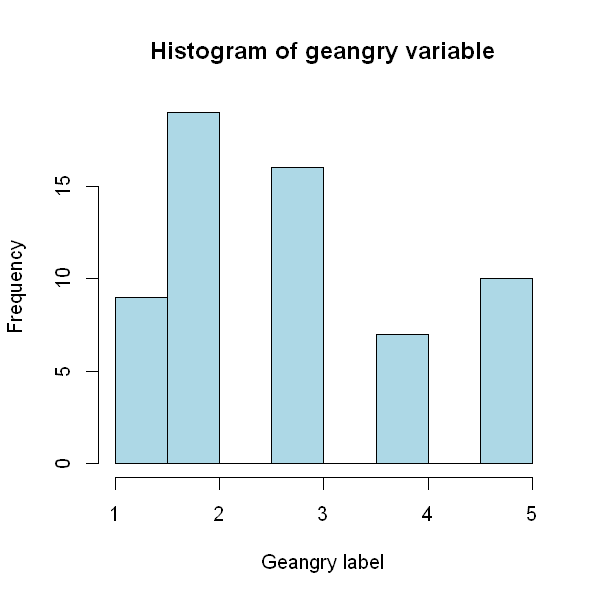

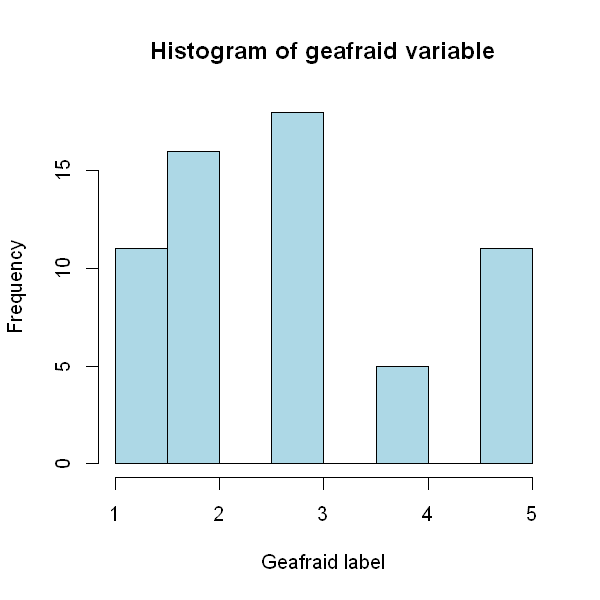

In [100]:
hist(q4_data_v18_nv16$geangry, main = "Histogram of geangry variable", xlab = "Geangry label", col = "lightblue", border = "black")
# hist(q4_data_v18_nv16$dtangry, main = "Histogram of dtangry variable", xlab = "Dtangry label", col = "lightblue", border = "black")
hist(q4_data_v18_nv16$geafraid, main = "Histogram of geafraid variable", xlab = "Geafraid label", col = "lightblue", border = "black")
# hist(q4_data_v18_nv16$dtafraid, main = "Histogram of dtafraid variable", xlab = "Dtafraid label", col = "lightblue", border = "black")

Unfortunately, we see several cases of "-1" (legitimate skip) response for the **dtangry and dtafraid** variables for these 61 respondents. So we will only use **geangry and geafraid** variables for measuring anger and fear in our analysis

In [101]:
paste("Percentage of dtafraid where question was skipped")
100 * nrow(q4_data_v18_nv16[q4_data_v18_nv16$dtafraid == -1,]) / nrow(q4_data_v18_nv16)

[1] "Percentage of dtafraid where question was skipped"

[1] 45.90164

In [102]:
paste("Percentage of dtangry where question was skipped")
100 * nrow(q4_data_v18_nv16[q4_data_v18_nv16$dtangry == -1,]) / nrow(q4_data_v18_nv16)

[1] "Percentage of dtangry where question was skipped"

[1] 45.90164

### Based on your EDA, select an appropriate hypothesis test. (5 points)

Few observations:

1. The measurements of fear and anger are likert variables. These are NOT metric values.
2. However, these are **comparable in measurement across feelings** because they are measured on the SAME scale and measured against the SAME audience. So a score of geafraid=5 and geangry=1 will show that respondent is more afraid than angry.
4. The distribution of both geafraid and geangry cannot be determined due to likert nature. **So we will have to use "non parametric tests"**.
5. Note that we are NOT interested in "how much more" did anger or fear influence increase in voter turnout. We are interested in "which feeling dominated the voter turnout increase in 2018". Specifically, **we are interested in the sign of the test** where the sign indicates which feeling is dominant. Note that because we use non-parametric signed tests, we are throwing out information of the likert scale (how much feeling).
6. These are **paired measurements against the same individual across 2 feelings** - geangry and geafraid.
7. Notice sample size is large (61), so n > 40.
8. Hence, we will conduct a paired non parametric test, specifically, the **Signed test for Dependent Samples**

Assumptions:

1. We can assume as per instructions in the lab that each pair of geafraid and geangry, say (afr, ang) are IID from every other pair.
2. We do have an ordinal scale for measurement (0 to 5).

Consequence:
1. Because we are throwing away all our likert information, we **lose some statistical power with the signed test.**

Hypothesis:

1. Let plus = number of total events of seeing geangry > geafraid
2. Let minus = number of total events of seeing geangry < geafraid
3. Here, plus ~ Binomial(n, 0.5)

**Ho: Prob(plus) = Prob(minus)**

**Ha: Prob(plus) != Prob(minus)**

**Note that we are answering the following question: Out of the voters who didn't vote in 2016, but did vote in 2018, was it fear or anger that motivated them to vote?**

### Conduct your test. (5 points)

In [105]:
equal_hat = nrow(q4_data_v18_nv16[q4_data_v18_nv16$geangry == q4_data_v18_nv16$geafraid,])
plus_hat = nrow(q4_data_v18_nv16[q4_data_v18_nv16$geangry > q4_data_v18_nv16$geafraid,])
minus_hat = nrow(q4_data_v18_nv16[q4_data_v18_nv16$geangry < q4_data_v18_nv16$geafraid,])
total_hat = as.numeric(equal_hat + plus_hat + minus_hat)
# ignore equal scores of geangry and geafraid for binomial test
n = total_hat - equal_hat

paste("geangry == geafraid:", equal_hat)
paste("geangry > geafraid:", plus_hat)
paste("geangry < geafraid:", minus_hat)
paste("total:", total_hat)
paste("total - equal:", n)

# binomial test
p = 0.5
mean = n * p
threshold = abs(plus_hat - mean)
paste("The mean:", mean)
paste("The threshold:", threshold)
binom.test(x = c(plus_hat, minus_hat), n, p = 0.5, alternative = c("two.sided"), conf.level = 0.95)

[1] "geangry == geafraid: 29"

[1] "geangry > geafraid: 16"

[1] "geangry < geafraid: 16"

[1] "total: 61"

[1] "total - equal: 32"

[1] "The mean: 16"

[1] "The threshold: 0"


	Exact binomial test

data:  c(plus_hat, minus_hat)
number of successes = 16, number of trials = 32, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.318875 0.681125
sample estimates:
probability of success 
                   0.5 


Note that there are only 32 values, after disregarding the respondents who are equally afraid or angry. Out of these 32 values, 16 are more angry and 16 are more afraid.

We can see from the binomial test that the alternative hypothesis is rejected as voters are equally likely to be afraid or angry. **This shows that neither of these feelings influences them more to come and vote in 2018**. There is no effect size to be calculated as there is no effect to be measured